In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from aicsimageio import AICSImage
import pyvips
import os, time

In [3]:
DATA_DIR = "/raid/mpsych/AXOLOTL"
SCAN = "MRE11_30 LFL Slide 2(1).czi"
SHORT_SCAN = "MRE11_30"

OUTPUT_DIR = "web/" + SHORT_SCAN

In [4]:
img = AICSImage(os.path.join(DATA_DIR, SCAN))
# print(img.metadata)
# print(img.dims)  
# print(img.shape)  

# Get reader
# reader = CziReader(os.path.join(DATA_DIR, SCAN))
# print(reader.data) 
# print(reader.dims) 
# print(reader.shape)

In [5]:
slices = []
for i,s in enumerate(img.scenes):
    t0 = time.time()
    
    stack = img.get_stack(select_scenes=[i])
    print("Shape of stack:", stack.shape)  # Print the shape of the stack
    r = stack[0,0,0,0,:,:].astype(float)
    r /= r.max()
    r *= 255
    r = r.astype(np.uint8)
    g = stack[0,0,1,0,:,:].astype(float)
    g /= g.max()
    g *= 255
    g = g.astype(np.uint8)
    b = stack[0,0,0,0,:,:].astype(float)
    b /= b.max()
    b *= 255
    b = b.astype(np.uint8)
    
    
#     # Assuming depth 1
#     depth1 = stack[0, 0, 0, 0, :, :].astype(float)
#     depth1 /= depth1.max()
#     depth1 *= 255
#     depth1 = depth1.astype(np.uint8)
    
#     # Assuming depth 2
#     depth2 = stack[0, 0, 1, 0, :, :].astype(float)
#     depth2 /= depth2.max()
#     depth2 *= 255
#     depth2 = depth2.astype(np.uint8)
    
#     arr = np.stack((depth1, depth2), axis=-1)
#     slices.append(arr)

# grey image
    
#     gray_slice = stack[0, 0, 0, 0, :, :].astype(float)
#     gray_slice /= gray_slice.max()
#     gray_slice *= 255
#     gray_slice = gray_slice.astype(np.uint8)
    
#     slices.append(gray_slice)
    
    arr = np.stack((r,g,b), axis=-1)
    slices.append( arr )
    print('Done loading scene', i, 'after', time.time()-t0)

Shape of stack: (1, 1, 2, 1, 57344, 38912)
Done loading scene 0 after 107.15156960487366


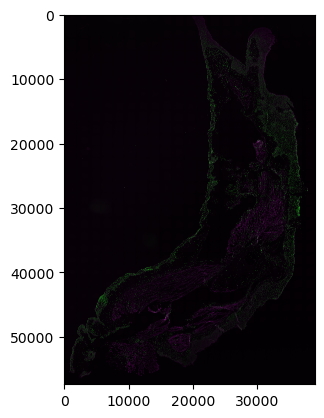

In [6]:
imshow(slices[0])

In [9]:
for i,s in enumerate(slices):
    t0 = time.time()
    vips_img = pyvips.Image.new_from_array(s)
    vips_img.dzsave(OUTPUT_DIR+'_'+str(i))
    print('Done converting scene', i, 'after', time.time()-t0)

Done converting scene 0 after 9.871216535568237
Done converting scene 1 after 8.438585042953491
Done converting scene 2 after 9.26169204711914
Done converting scene 3 after 8.57879376411438
